# Project 06
## **Exploratory Data Analysis: RMS Titanic** 

Joanna Farris  
September 30, 2024  

------

## **The Disaster**

The Titanic disaster is one of history's most infamous tragedies. In this EDA, we examine the Titanic dataset to uncover insights about the passengers aboard the ill-fated ship.

Using various data visualization and statistical methods, we'll explore the dataset for patterns to reveal factors that may have influenced survival during that tragic night.

-----





## **The Dataset**

The Titanic dataset is a well-known collection of data often used in data analysis and machine learning. It provides information about passengers aboard the RMS Titanic, which tragically sank on its first voyage in April 1912. The dataset includes details like age, gender, class, ticket fare, and survival staus. It’s a useful resource for exploring patterns and factors that might have affected survival during this historic event.

#### Key Features:

- **PassengerId**: A unique identifier for each passenger.
- **Survived**: A binary indicator (0 = No, 1 = Yes) representing whether the passenger survived the disaster.
- **Pclass**: The class of the ticket purchased by the passenger (1 = First, 2 = Second, 3 = Third).
- **Name**: The full name of the passenger.
- **Sex**: The gender of the passenger (male or female).
- **Age**: The age of the passenger in years (some entries may be missing).
- **SibSp**: The number of siblings or spouses aboard the Titanic.
- **Parch**: The number of parents or children aboard the Titanic.
- **Ticket**: The ticket number of the passenger.
- **Fare**: The fare paid for the ticket.
- **Cabin**: The cabin number where the passenger stayed (some entries may be missing).
- **Embarked**: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).  

------




## **The Libraries**

In [239]:
import requests
import pathlib as path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

-----

## **The Aquisition**  

The `sns.load_dataset()` function is used to load the Titanic dataset directly from Seaborn's built-in datasets into a Pandas DataFrame. This step is essential as it provides easy access to a clean and structured version of the dataset, allowing for straightforward data manipulation and analysis. After executing this command, the dataset will be stored in the variable `df`, which we can then use for further exploration and analysis.


In [240]:
df = sns.load_dataset('titanic')

----

## **The Initial Inspection**  

For our initial data inspection, we will use `df.head(10)` to display the first 10 rows of the DataFrame, use `df.shape` to assess its dimensions, and review the data types of each column with `df.dtypes`.

In [241]:
# Display the first 5 rows in a neatly formatted table
df.head(10).style.set_properties(**{'text-align': 'center'})

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,nan,Southampton,no,False
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.925000,S,Third,woman,False,nan,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.100000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.050000,S,Third,man,True,nan,Southampton,no,True
5,0,3,male,nan,0,0,8.458300,Q,Third,man,True,nan,Queenstown,no,True
6,0,1,male,54.000000,0,0,51.862500,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.000000,3,1,21.075000,S,Third,child,False,nan,Southampton,no,False
8,1,3,female,27.000000,0,2,11.133300,S,Third,woman,False,nan,Southampton,yes,False
9,1,2,female,14.000000,1,0,30.070800,C,Second,child,False,nan,Cherbourg,yes,False


The first ten entries in the dataset provide a snapshot of the passengers on the Titanic. It includes a mix of male and female passengers, with varying ages and survival status. For example, the first entry shows a female passenger in first class who survived, while the fourth entry depicts a male passenger in third class who did not survive. This initial view reveals the diversity of the passenger demographic.


In [242]:
df.shape

(891, 15)

The dataset contains 891 entries and has 15 columns.

In [243]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

The DataFrame contains a mix of data types, including integers (e.g., for passenger class and survival status), floats (e.g., for age), and objects (e.g., for names and categories like sex).



-----

## **The Initial Statistics**  

For the initial descriptive statistics, we will utilize the `df.describe()` function, which provides a comprehensive summary of key statistics for the numerical columns in the dataset, including the mean, median, standard deviation, and more. This analysis offers valuable insights into the distribution and variability of the data.

In [244]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The dataset provides key insights into the numeric columns. For instance, the average fare paid by passengers is approximately $32.20, with a minimum fare of $0 and a maximum fare of $512.32. The age of passengers has a mean of about 29.7 years, but there is a notable range, as the youngest passenger is only 0.42 years old (an infant) and the oldest is 80 years old. This indicates a diverse age distribution among passengers.

----

## **The Initial Distribution for Categorical Columns**  

In this section, we will explore the initial data distribution of the categorical columns within the dataset using a variety of visualizations, including pie charts, and bar charts. We aim to gain insights into the underlying patterns and distributions of numerical data. 


#### First, we will visualize the survival distribution of passengers aboard the Titanic using a pie chart.

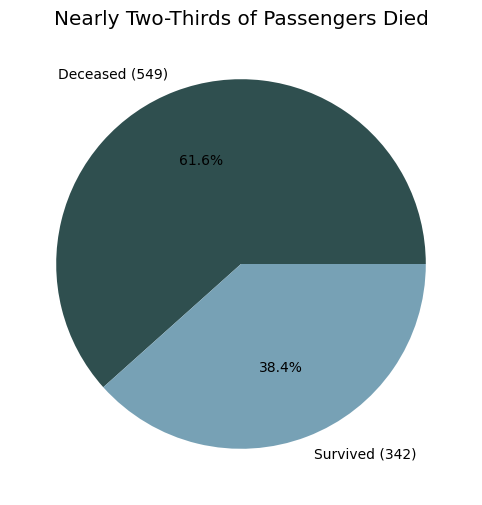

In [245]:
# Mapping 0 and 1 to "Deceased" and "Survived"
survivors = df["survived"].map({0: "Deceased", 1: "Survived"}).value_counts()

# Create custom labels with counts from survivors
labels = [f'Deceased ({survivors["Deceased"]})', f'Survived ({survivors["Survived"]})']        

# Creating a pie chart with labels including value counts
plt.figure(figsize=(8, 6))
survivors.plot(kind='pie', autopct='%1.1f%%', colors=['darkslategray', "xkcd:greyblue"],
               labels=labels)
plt.title('Nearly Two-Thirds of Passengers Died')
plt.ylabel('')  # Hide the y-label for the pie chart
plt.show()

# print(survivors)

* This pie chart provides a clear overview of the survival rates within the dataset.

#### Next, we will visualize the class distribution of passengers aboard the Titanic using a bar chart.

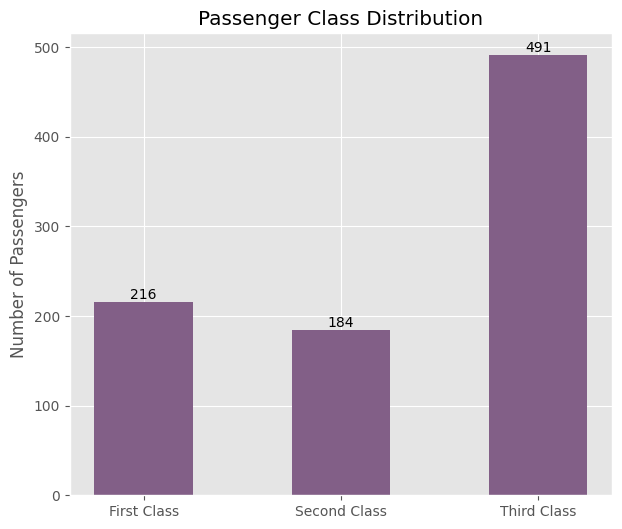

In [246]:
# Extracting and sorting pclass (passenger class) value counts
pclass_counts = df['pclass'].value_counts().sort_index()

# Create custom labels for the classes
class_labels = ['First Class', 'Second Class', 'Third Class']

# Creating a bar chart with the updated labels
plt.figure(figsize=(7, 6))
bars = plt.bar(class_labels, pclass_counts, color="xkcd:dusty purple",
               width=0.5)

# Adding value labels on top of each bar
for bar in bars:
    plt.annotate(f'{bar.get_height()}', 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', fontsize=10)

# Adding titles and labels
plt.title('Passenger Class Distribution')
plt.xlabel('')
plt.ylabel('Number of Passengers')

# Display the chart
plt.show()

* This bar chart depicts the class distribution of passengers, indicating that a majority traveled in third class, followed by second class, and the least number in first class, reflecting the socioeconomic factors influencing passenger demographics.



#### Finally, we will visualize the distribution of sex among the passengers on the titanic using a bar chart.

/var/folders/s7/d6_jmkk96kn7w3t6vjr0_h640000gn/T/ipykernel_1913/3155834778.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='PuBuGn_d')


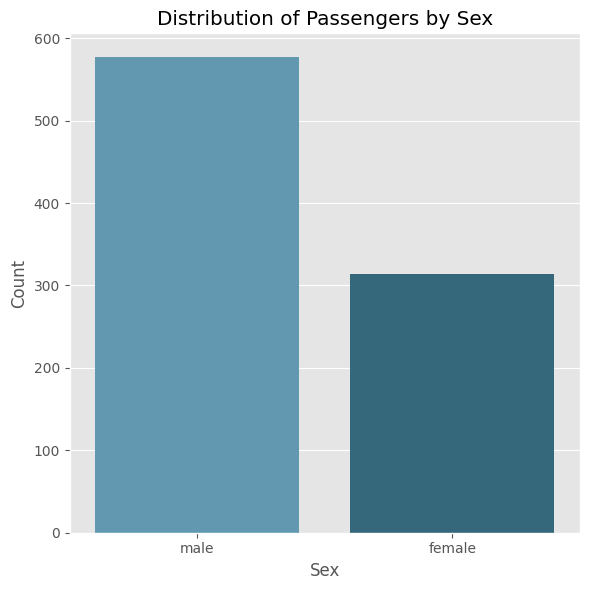

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better readability
plt.figure(figsize=(6, 6))

# Create a bar chart for "sex"
sns.countplot(x='sex', data=df, palette='PuBuGn_d')
plt.title('Distribution of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


* The bar chart shows that nearly two-thirds of the passengers were male. 

------

## **The Initial Distribution for Numerical Columns**

Here, we will use a histogram to visualize the age distribution of of passengers aboard the Titanic.

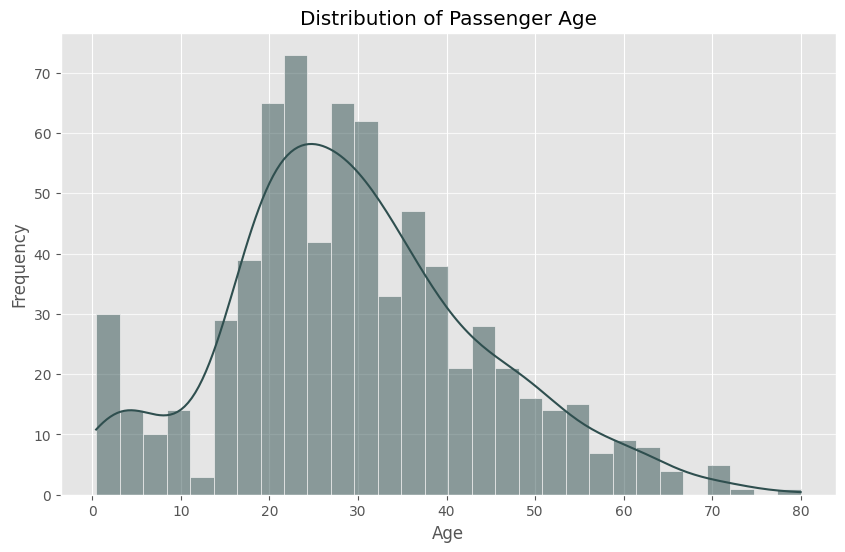

In [248]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='darkslategray')  # Add kde=True
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


* This histogram illustrates the age distribution of passengers, revealing a higher concentration of individuals in their twenties and thirties, while highlighting the limited representation of very young children and older adults.

-----

## **The Initial Data Transformation and Feature Engineering**

#### **Column Renaming:** We renamed the pclass column to passenger_class to improve clarity and better reflect its purpose in the dataset.

In [249]:
# Rename 'pclass' column to 'passenger_class'
df.rename(columns={'pclass': 'passenger_class'}, inplace=True)

#### **New Feature Creation:** We introduced a new column called family_size, which represents the sum of sibsp (siblings/spouses aboard) and parch (parents/children aboard). This feature allows us to explore the relationship between family size and survival rates.

In [250]:
# Add a new column 'family_size' by summing 'sibsp' and 'parch'
df['family_size'] = df['sibsp'] + df['parch']

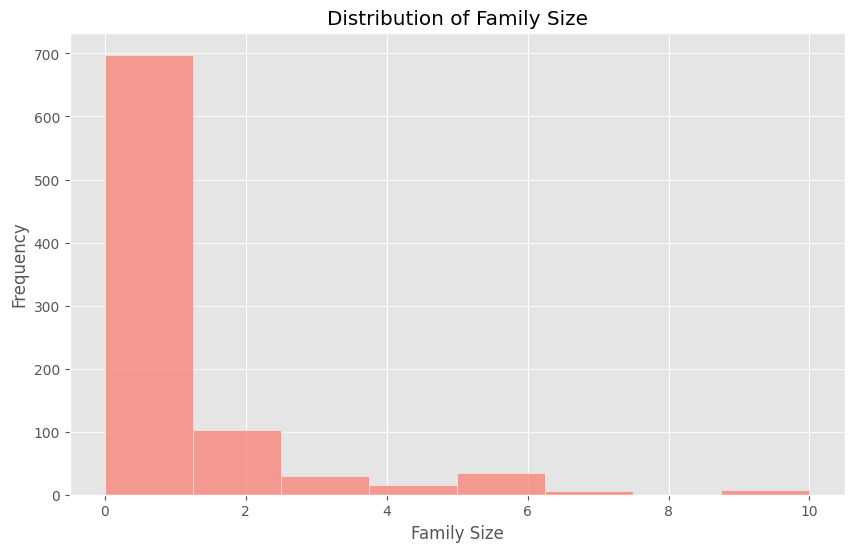

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column 'family_size'
df['family_size'] = df['sibsp'] + df['parch']

# Plot a histogram to visualize the distribution of family size
plt.figure(figsize=(10, 6))
sns.histplot(df['family_size'], bins=8, kde=False, color='salmon')

# Add titles and labels
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Frequency')

# Show the plot
plt.grid(axis='y', alpha=0.75)
plt.show()


* This chart shows the distribution of data from our newly created column Family Size, indicating that the vast majority of passengers had a family size of zero.

------

## **The Initial Visualizations**

### 1. Compare the Who Categories of Passengers and Deceased Individuals:  

**Goal:**  To explore the demographic breakdown of passengers and analyze how these demographics affected survival rates during the Titanic disaster. By comparing the "who" categories—men, women, and children—among both passengers and those who did not survive, we aim to gain insights into the characteristics of different groups on board.  

**Chart Type:**  We will use pie charts to illustrate the proportions of men, women, and children in both the total passenger group and the group of deceased passengers. This type of chart is effective for visualizing the relative sizes of parts to a whole and will help in easily comparing the two groups.  

**Chart:**

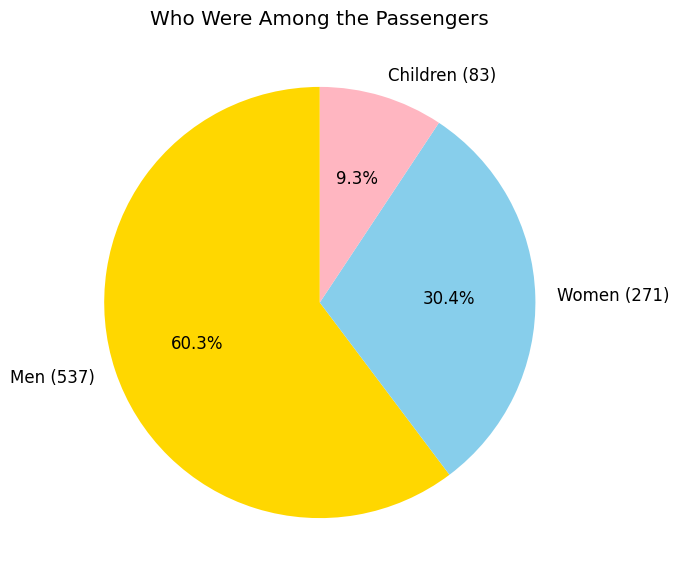

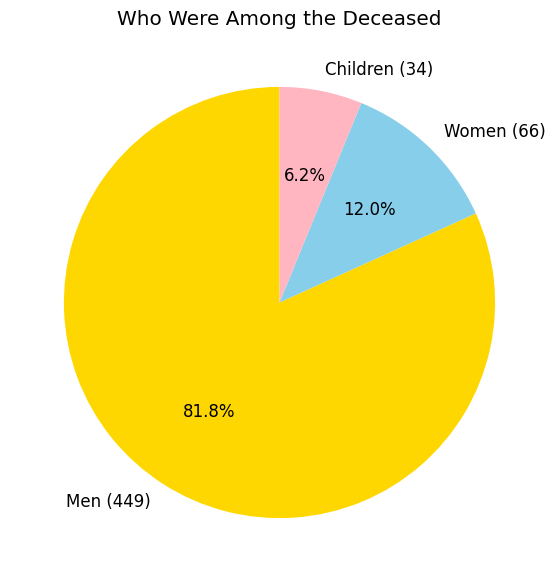

In [253]:
# Calculate the total number of passengers in each 'who' category
who_counts = df['who'].value_counts()

# Custom labels with count (not percentage) for "who" category
labels = [f'Men ({who_counts["man"]})', 
          f'Women ({who_counts["woman"]})', 
          f'Children ({who_counts["child"]})']

# Create a pie chart for the "who" category among passengers
plt.figure(figsize=(7, 7))
plt.pie(who_counts, labels=labels, autopct='%1.1f%%',
        colors=['gold', 'skyblue', 'lightpink'], startangle=90, textprops={'fontsize': 12})

# Add a title
plt.title('Who Were Among the Passengers')

# Display the pie chart
plt.show()

# Filter the DataFrame for passengers who did not survive
deceased_passengers = df[df['survived'] == 0]

# Get the count of deceased passengers in each "who" category
who_deceased_counts = deceased_passengers['who'].value_counts()

# Calculate percentages for the pie chart
percentage_who_deceased = (who_deceased_counts / who_deceased_counts.sum()) * 100

# Custom labels with count (not percentage) for "who" category
labels = [f'Men ({who_deceased_counts["man"]})', 
          f'Women ({who_deceased_counts["woman"]})', 
          f'Children ({who_deceased_counts["child"]})']

# Create a pie chart for the "who" category among deceased passengers
plt.figure(figsize=(7, 7))
plt.pie(percentage_who_deceased, labels=labels, autopct='%1.1f%%',
        colors=['gold', 'skyblue', 'lightpink'], startangle=90, textprops={'fontsize': 12})

# Add a title
plt.title('Who Were Among the Deceased')
plt.show()

**Story:** The side-by-side pie charts offer a striking visual comparison of the "who" categories among both passengers and the deceased on the Titanic. The first chart indicates that men comprised the majority of passengers, followed by women and children, with men making up a significant portion of the total count. Conversely, the second chart illustrates a similar trend among those who did not survive: men represented the largest share of deceased passengers, with women and children accounting for smaller proportions.  

This comparison highlights the tragic outcome of the disaster, where men, despite their majority status on board, faced a staggering mortality rate of 83%. Notably, children constituted only 6.2% of the overall deceased, but still 40% of the children on board did not survive. In contrast, women had the highest survival rate, with only 23% not surviving.  

These figures raise questions about social norms and rescue priorities that may have influenced survival outcomes. Analyzing these demographics sheds light on the human aspect of the Titanic tragedy, emphasizing how gender and age impacted survival rates during this historical event.


### 2.  Passenger Survival Counts by Class

**Goal:**  Examine how survival rates varied across different passenger classes and how the number of survivors compares to those who did not survive in each class.

**Chart Type:**  Side-by-Side Bar Chart

**Chart:**

<Figure size 1000x600 with 0 Axes>

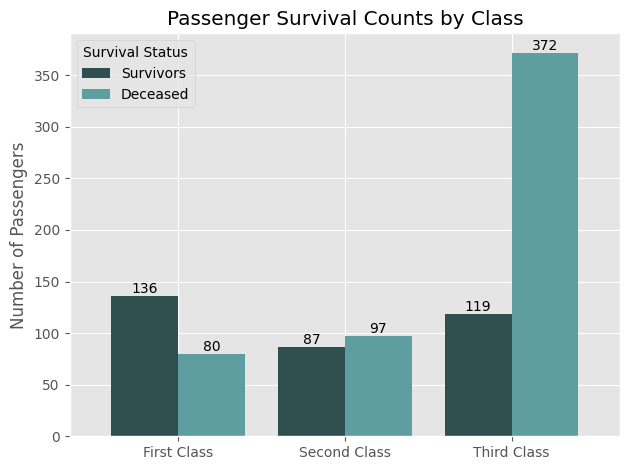

In [254]:
import matplotlib.pyplot as plt

# Example DataFrame setup
survivors_counts = df[df['survived'] == 1]['passenger_class'].value_counts()
deceased_counts = df[df['survived'] == 0]['passenger_class'].value_counts()

# Combine the counts into a DataFrame
combined_counts = pd.DataFrame({
    'Survivors': survivors_counts,
    'Deceased': deceased_counts
}).fillna(0)  # Fill NaN values with 0 for any missing class


# Plotting side by side bar chart
plt.figure(figsize=(10, 6))
bars = combined_counts.plot(kind='bar', color=['darkslategrey', 'cadetblue'], width=0.8)

# Customize x-axis labels
plt.title('Passenger Survival Counts by Class')
plt.xlabel('')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1, 2], ['First Class', 'Second Class', 'Third Class'], rotation=0)
plt.legend(title='Survival Status')

# Add counts on top of bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), 
             ha='center', va='bottom')  # va='bottom' ensures the text is above the bar

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()




**Story:** The bar chart shows that first-class passengers had a higher survival count compared to second- and third-class passengers. The survival rate decreases significantly as the class gets lower, with third-class passengers facing the highest fatality rate.


### 3.  Percentage of Survivors by Passenger Class

**Goal:** Analyze the survival rate across different passenger classes to understand which class had the highest and lowest survival rates.  

**Chart Type:** Bar Chart

**Chart:**

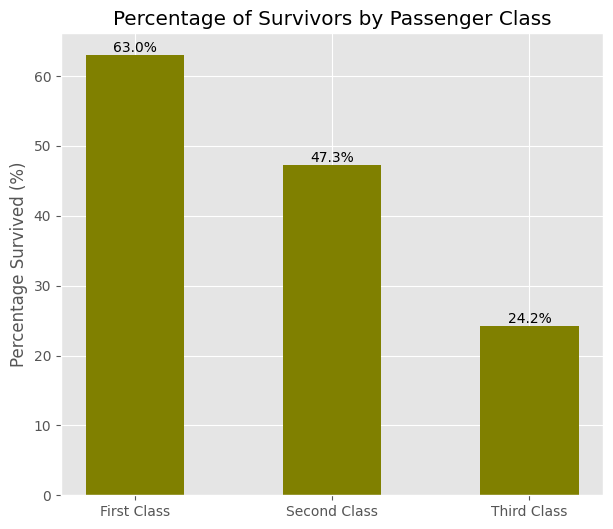

In [255]:
# Get the count of survived passengers in each class
survived_class_counts = df[df['survived'] == 1]['passenger_class'].value_counts().sort_index()

# Get the total count of passengers in each class
pclass_counts = df['passenger_class'].value_counts().sort_index()

# Calculate the percentage of survived passengers per class
percentage_survived = (survived_class_counts / pclass_counts) * 100

# Create a bar chart
plt.figure(figsize=(7, 6))
bars = plt.bar(['First Class', 'Second Class', 'Third Class'], percentage_survived, 
               color='olive', width=0.5)

# Adding percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 (bar.get_x() + bar.get_width() / 2, height), 
                 ha='center', va='bottom', fontsize=10)

# Adding titles and labels
plt.title('Percentage of Survivors by Passenger Class')
plt.xlabel('')
plt.ylabel('Percentage Survived (%)')

plt.show()


**Story:** This bar chart reveals that first-class passengers had the highest survival rate, while third-class passengers had the lowest. This suggests that class status played a significant role in determining the likelihood of survival during the Titanic disaster.


### 4. Passenger Age vs. Survival Rate  

**Goal:** Investigate whether age was a significant factor in passenger survival.  

**Chart Type:** Violin plot to illustrate the distribution of ages for survived and deceased passengers.  

**Chart:**

/var/folders/s7/d6_jmkk96kn7w3t6vjr0_h640000gn/T/ipykernel_1913/779575115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='survived', y='age', data=df, palette='gist_heat')


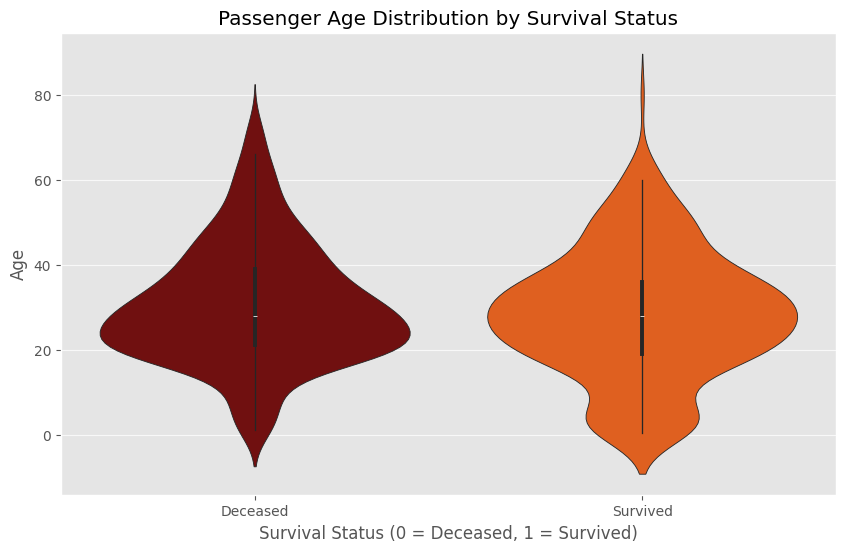

In [256]:
# Create a violin plot for age distribution by survival status
plt.figure(figsize=(10, 6))
sns.violinplot(x='survived', y='age', data=df, palette='gist_heat')
plt.title('Passenger Age Distribution by Survival Status')
plt.xlabel('Survival Status (0 = Deceased, 1 = Survived)')
plt.ylabel('Age')
plt.xticks([0, 1], ['Deceased', 'Survived'])  # Customize x-tick labels
plt.grid(axis='y', alpha=0.75)
plt.show()


**Story:**  The violin plot showcases the age distribution of Titanic passengers, distinguishing between those who survived and those who did not. The plot reveals that younger passengers, particularly children, had a higher survival rate, as evidenced by the greater density of survivors in the lower age range. In contrast, the age distribution for deceased passengers shows a wider spread, indicating that adults constituted a larger portion of the fatalities. This visualization highlights the critical impact of age on survival during the Titanic disaster, suggesting that younger individuals were more likely to survive, possibly due to prioritization in lifeboat access or other sociocultural factors at play during the tragedy.

-----

## **The Conclusion** 

This analysis revealed significant trends, such as the majority of passengers being men, high mortality rates among children, and the influence of passenger class on survival. The combination of visualizations and data transformations offered a comprehensive view of the Titanic tragedy, enhancing understanding of the demographics and survival outcomes during this historical event. 




##